# Hull Moving Average

https://www.incrediblecharts.com/indicators/hull-moving-average.php

https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/hull-moving-average

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,168.339050,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,168.309738,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,169.091522,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,171.016678,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,170.381485,20567800


In [3]:
import talib as ta

In [4]:
n = 30
df['WMA_1'] = ta.WMA(df['Adj Close'], timeperiod=n/2) * 2
df['WMA_2'] = df['WMA_1'] - ta.WMA(df['Adj Close'], timeperiod=n)
df['HMA'] = ta.WMA(df['WMA_2'], timeperiod=math.sqrt(n))
df = df.drop(['WMA_1', 'WMA_2'], axis=1)

In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,HMA
Date,,,,,,,
2018-12-24,148.149994,151.550003,146.589996,146.830002,145.642090,37169200,157.223447
2018-12-26,148.300003,157.229996,146.720001,157.169998,155.898438,58582500,154.946850
2018-12-27,155.839996,156.770004,150.070007,156.149994,154.886688,53117100,153.115045
2018-12-28,157.500000,158.520004,154.550003,156.229996,154.966034,42291400,151.774790
2018-12-31,158.529999,159.360001,156.479996,157.740005,156.463837,35003500,150.991700


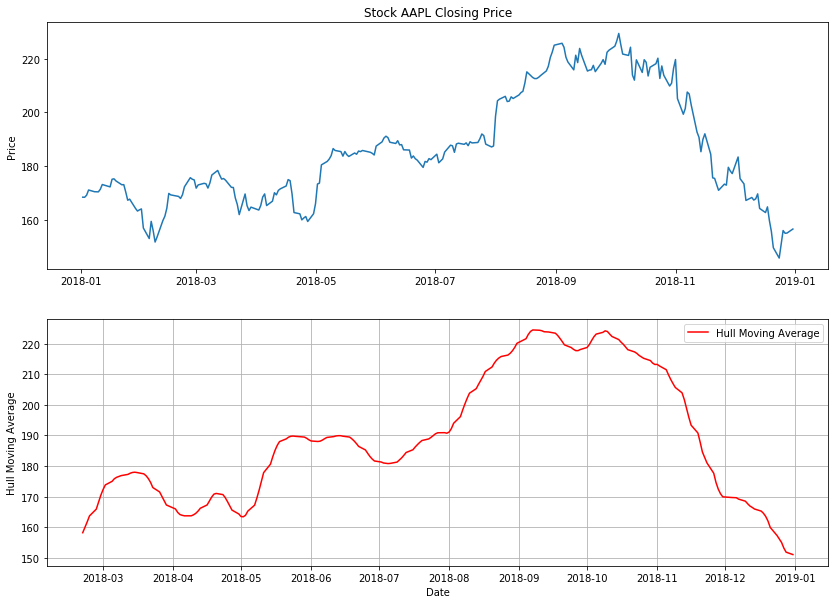

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['HMA'], label='Hull Moving Average', color='red')
#ax2.axhline(y=0, color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Hull Moving Average')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with Hull Moving Average

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HMA,VolumePositive
0,736696.0,170.160004,172.300003,169.259995,172.259995,168.339050,25555900,NaN,False
1,736697.0,172.529999,174.550003,171.960007,172.229996,168.309738,29517900,NaN,False
2,736698.0,172.539993,173.470001,172.080002,173.029999,169.091522,22434600,NaN,False
3,736699.0,173.440002,175.369995,173.050003,175.000000,171.016678,23660000,NaN,False
4,736702.0,174.350006,175.610001,173.929993,174.350006,170.381485,20567800,NaN,False


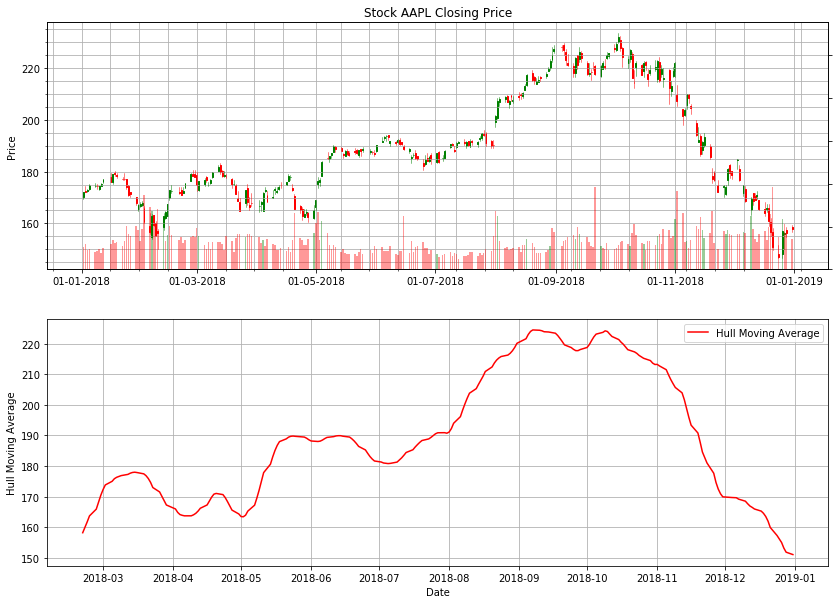

In [8]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['HMA'], label='Hull Moving Average', color='red')
#ax2.axhline(y=0, color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Hull Moving Average')
ax2.set_xlabel('Date')
ax2.legend(loc='best')